# 0. Iris Dataset.

The iris dataset is a collection of measurements for iris flowers, where each data point has four features (sepal length, sepal width, petal length, and petal width) and is labeled with the species of iris flower it belongs to.

The target values (or labels) for each species are represented by numerical values as follows:

* Setosa: Target value 0
* Versicolor: Target value 1
* Virginica: Target value 2



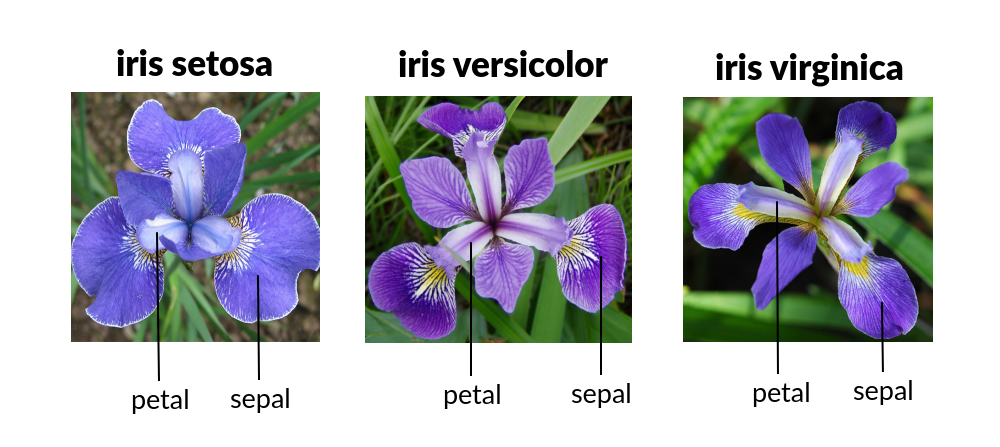



The iris dataset is a classic dataset in machine learning and statistics. It is often used for classification tasks. This dataset is included in many machine learning libraries, including scikit-learn, where it's readily available for experimentation.

Here's what each variable represents:

* **iris:** This variable typically holds the dataset itself. In this case, it's loaded using load_iris() function from scikit-learn library.
* **data:** This variable contains the feature vectors of the dataset. In the iris dataset, each feature vector represents the measurements of sepal length, sepal width, petal length, and petal width for a particular iris flower.
* **target:** This variable contains the labels or classes corresponding to each data point in the dataset. In the iris dataset, it represents the species of iris flowers.
* **feature_names:** This variable contains the names of the features (i.e., sepal length, sepal width, petal length, and petal width).

# 1. Dataset pre-processing and visualization.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load the iris dataset, then get the data, target, and feature names in separate variables
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

# Create a DataFrame and load the data into it
df = pd.DataFrame(data, columns=feature_names)

# add a column to df and name it as 'Target' and then load the target variable into it
df['Target'] = target

#view the dataframe
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# Check for missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

In [4]:
# Display basic statistics using .describe()
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


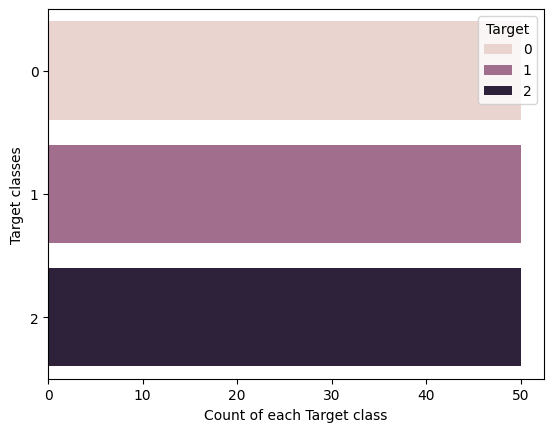

In [7]:
# plot the count of each Target (class) in df using countplot from seaborn
sns.countplot(y=df.Target ,data=df, hue=df.Target)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

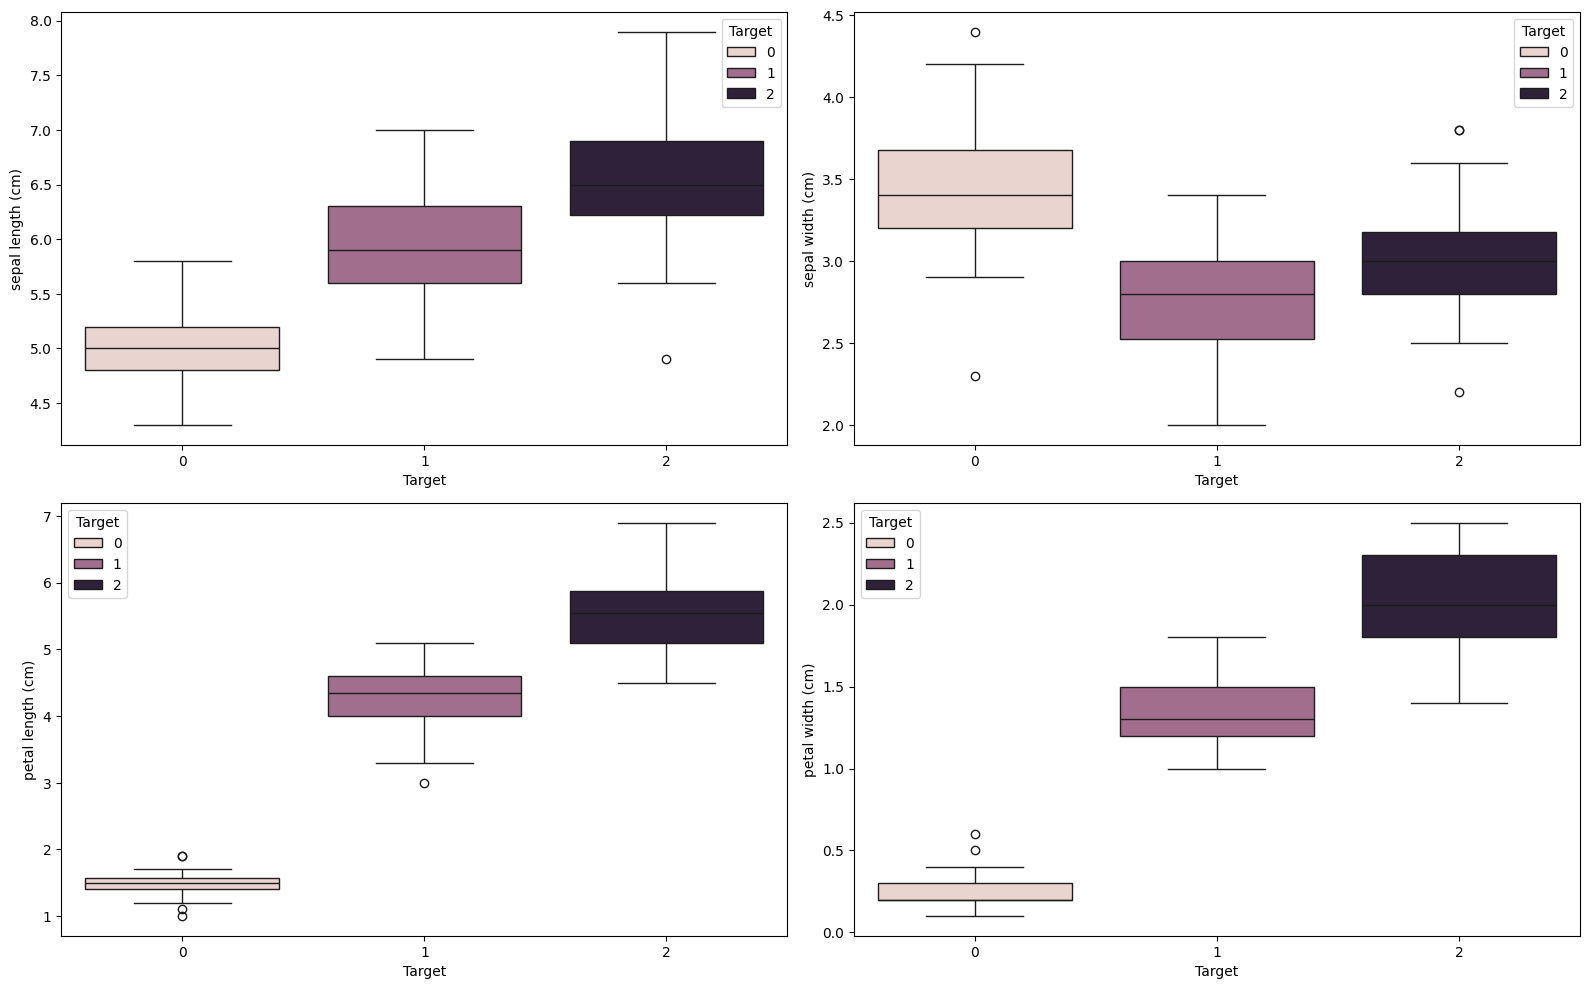

In [13]:
# plot a box plot for each column (Y-axis) - target (X-axis)
# you can choose to create 4 subplots or have four separate plots
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0

for i in range(len(df.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['Target'], y = df[df.columns[i]],ax = axes, hue=df.Target)
    col += 1

plt.tight_layout()
plt.show()

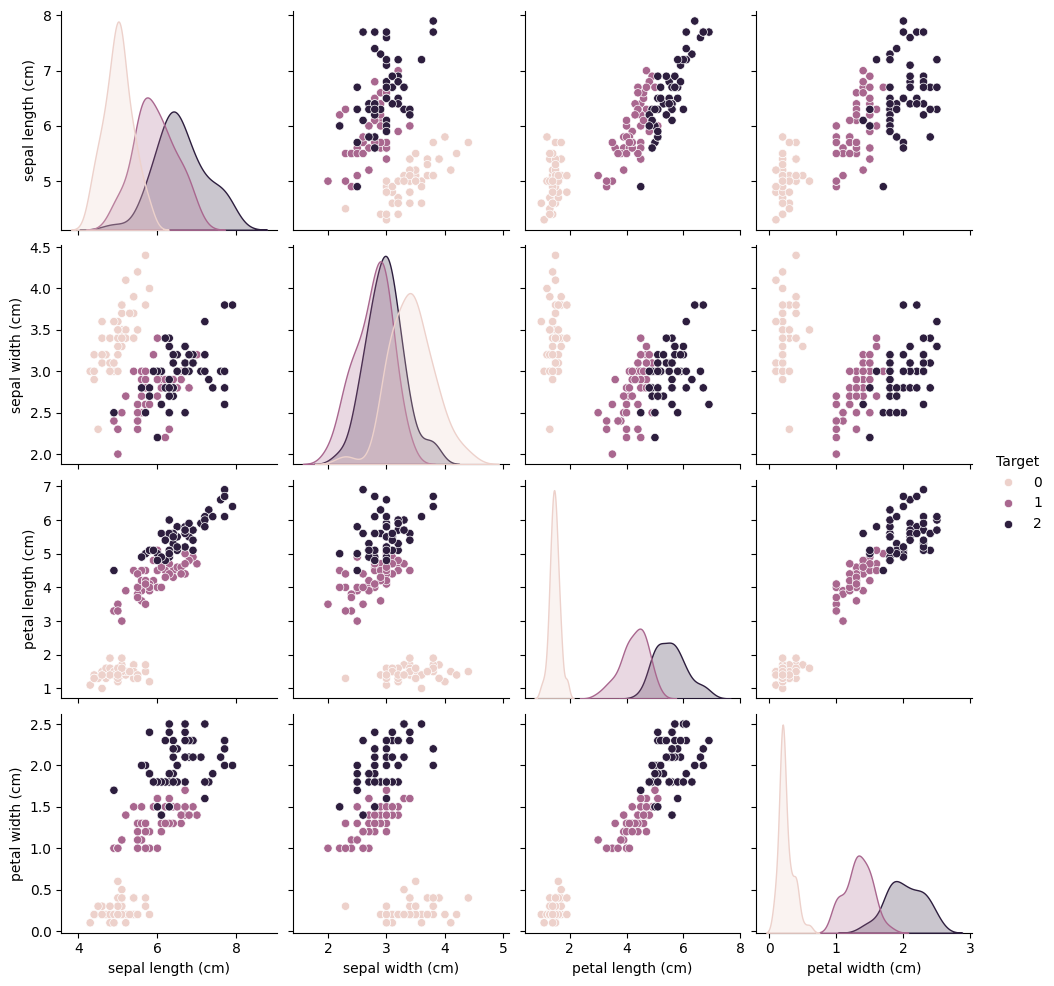

In [14]:
# create a pair plot using seaborn and define the color (hue) as the target
p=sns.pairplot(df, hue = 'Target')

In [15]:
# scale the features only using StandardScalar(). Last column should not be included.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])

# 2. PCA Implementation.

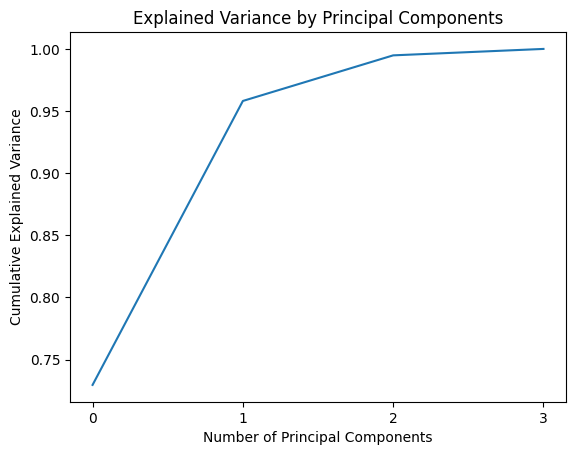

In [27]:
# Initiate the PCA model
pca = PCA()

# Fit the model to the scaled data
pca_result = pca.fit_transform(scaled_data)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(0, 4, 1))
plt.show()

In [17]:
# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, len(feature_names)+1)])
pca_df

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


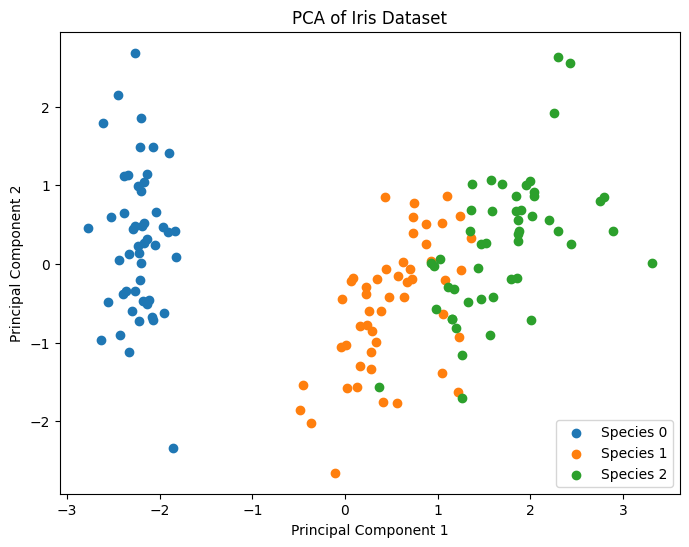

In [18]:
# Add the target column to the PCA DataFrame
pca_df['Target'] = target

# Visualize the first two principal components
plt.figure(figsize=(8, 6))
for species in range(3):
    plt.scatter(
        pca_df.loc[pca_df['Target'] == species, 'PC1'],
        pca_df.loc[pca_df['Target'] == species, 'PC2'],
        label=f'Species {species}'
    )

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


* **random_state:** This parameter is used to control the random seed used by the random number generator. When you set a value for random_state, you ensure that the split will be reproducible. That is, if you run the code multiple times with the same random_state, you will get the same split every time. This is useful for reproducibility and debugging.

* **stratify:** This parameter is used for stratified sampling. When you set stratify to an array-like object, typically the target variable, the split will be such that the proportion of the classes in the training and testing sets will be the same as the proportion of classes in the entire dataset. This is particularly useful when dealing with imbalanced datasets to ensure that each class is adequately represented in both the training and testing sets.

In [20]:
# Create a train/test split using the PCA dataframe. Use 20% test size, random_state=20, and set stratify to be equal to the target column values.
X_train, X_test, y_train, y_test = train_test_split(pca_df.iloc[:, :-1], pca_df['Target'].values, test_size = 0.2, random_state=20, stratify=pca_df['Target'].values)

# 3. KNN Classifier with PCA.



Optimal k= 8


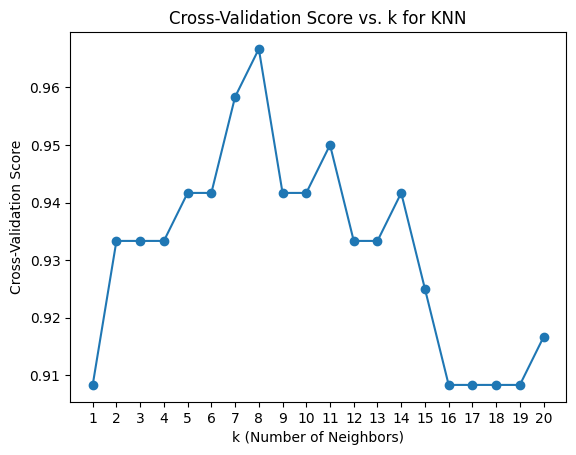

Test Accuracy with k=8: 96.66666666666667%


In [30]:
# Define a range of k values to try. Use at least a list of 20 values.
k_values = list(range(1, 21))

# Create an empty list to store cross-validation scores for each k
cv_scores = []

# Perform k-fold cross-validation for each k
for k in k_values:
    # Create a KNN model with n_neighbors
    model = KNeighborsClassifier(n_neighbors=k)

    # Perform cross-validation using the training subset
    scores = cross_val_score(model, X_train, y_train, cv=5)  # You can adjust the number of folds (cv) as needed

    # Average cross-validation scores for this k and append them to cv_scores
    cv_scores.append(np.mean(scores))


# Find the optimal k with the highest cross-validation score and print it
optimal_k = k_values[np.argmax(cv_scores)]
print(f'Optimal k= {optimal_k}')

# Plot the cross-validation scores for different k values
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Score vs. k for KNN')
plt.xticks(range(min(k_values), max(k_values)+1, 1))
plt.show()

# Train the final model with the optimal k using the entire training set
final_model = KNeighborsClassifier(n_neighbors=optimal_k)
final_model.fit(X_train, y_train)

# Evaluate the model using the test set and print out the 'test_accuracy'
test_accuracy = final_model.score(X_test, y_test)
print(f'Test Accuracy with k={optimal_k}: {test_accuracy*100}%')
